In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Caminho base onde as imagens foram organizadas
base_dir = 'D:/Workspace/jupyter/dataset'  # ajuste para seu caminho

# Gerador para treino com aumento de dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Geradores para validação e teste (somente normalização)
test_datagen = ImageDataGenerator(rescale=1./255)

# Dados de treino
train_gen = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

# Dados de validação
val_gen = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 19998 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Input

# Definindo o modelo
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
from PIL import Image, UnidentifiedImageError
import os

# Caminhos das pastas de treino, validação e teste
base_dir = 'D:/Workspace/jupyter/dataset'
pastas = ['train', 'val', 'test']

# Função para verificar imagens inválidas ou corrompidas
def verificar_imagens_invalidas(diretorio_base, lista_pastas):
    for pasta in lista_pastas:
        caminho_pasta = os.path.join(diretorio_base, pasta)
        print(f'\nVerificando imagens em: {caminho_pasta}')
        for subpasta in os.listdir(caminho_pasta):
            caminho_subpasta = os.path.join(caminho_pasta, subpasta)
            if os.path.isdir(caminho_subpasta):
                for arquivo in os.listdir(caminho_subpasta):
                    caminho_arquivo = os.path.join(caminho_subpasta, arquivo)
                    try:
                        with Image.open(caminho_arquivo) as img:
                            img.verify()
                    except (UnidentifiedImageError, IOError, SyntaxError) as e:
                        print(f'Arquivo inválido ou corrompido: {caminho_arquivo}')

# Executa a verificação
verificar_imagens_invalidas(base_dir, pastas)



Verificando imagens em: D:/Workspace/jupyter/dataset\train

Verificando imagens em: D:/Workspace/jupyter/dataset\val

Verificando imagens em: D:/Workspace/jupyter/dataset\test


In [69]:
# Treinamento do modelo
history = model.fit(
    train_gen,
    steps_per_epoch=100,  # Número de batches por época
    epochs=15,
    validation_data=val_gen,
    validation_steps=50  # Número de batches de validação
)


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - accuracy: 0.5049 - loss: 1.4385 - val_accuracy: 0.5900 - val_loss: 0.6871
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.5249 - loss: 0.6884 - val_accuracy: 0.5590 - val_loss: 0.6876
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.5401 - loss: 0.7000 - val_accuracy: 0.5450 - val_loss: 0.6887
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.5623 - loss: 0.6846 - val_accuracy: 0.5440 - val_loss: 0.6842
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.5402 - loss: 0.6880 - val_accuracy: 0.5200 - val_loss: 0.6835
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.5442 - loss: 0.6837 - val_accuracy: 0.5740 - val_loss: 0.6823
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.5781 - loss: 0.6806 - val_accuracy: 0.5770 - val_loss: 0.6778
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.5847 - loss: 0

In [71]:
# Caminho do diretório de teste
test_dir = 'D:/Workspace/jupyter/dataset/test'

# Gerador de imagens de teste
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # O mesmo tamanho que foi usado para o treinamento
    batch_size=20,
    class_mode='binary',  # para classificação binária
    shuffle=False  # não embaralhar para manter a ordem dos dados
)

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_gen, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 2500 images belonging to 2 classes.
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.5776 - loss: 0.6992
Test Loss: 0.6340262293815613
Test Accuracy: 0.6579999923706055


In [72]:
from tensorflow.keras import layers, models

# Redefinindo um modelo mais profundo
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dropout(0.5),  # ajuda a reduzir overfitting
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # para classificação binária
])

# Compilando o modelo
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
history = model.fit(
    train_gen,
    steps_per_epoch=100,
    epochs=15,
    validation_data=val_gen,
    validation_steps=50
)


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 212ms/step - accuracy: 0.5100 - loss: 0.7073 - val_accuracy: 0.4950 - val_loss: 0.6908
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.5242 - loss: 0.6883 - val_accuracy: 0.5200 - val_loss: 0.6930
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.5153 - loss: 0.6938 - val_accuracy: 0.5150 - val_loss: 0.6905
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.4885 - loss: 0.6943 - val_accuracy: 0.5670 - val_loss: 0.6904
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.5466 - loss: 0.6901 - val_accuracy: 0.5740 - val_loss: 0.6958
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.5559 - loss: 0.6854 - val_accuracy: 0.5900 - val_loss: 0.6819
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.5369 - loss: 0.6946 - val_accuracy: 0.5760 - val_loss: 0.6854
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.5455 - loss: 0

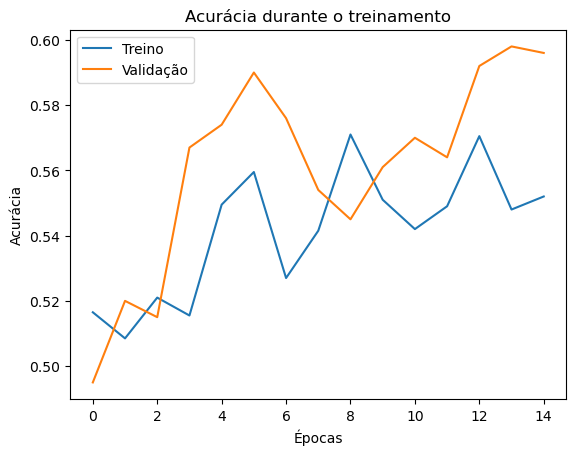

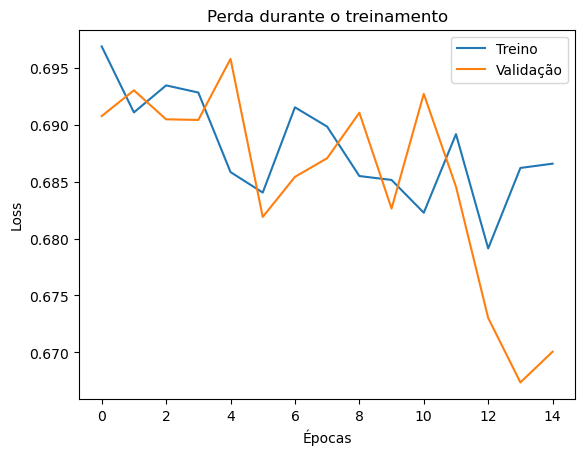

In [74]:
import matplotlib.pyplot as plt

# Precisão
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Perda
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [83]:
model.save('modelo_cachorros_gatos.keras')


In [78]:
loss, accuracy = model.evaluate(test_gen)
print(f"Acurácia no conjunto de teste: {accuracy * 100:.2f}%")


125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.5137 - loss: 0.6750
Acurácia no conjunto de teste: 58.88%
